In [384]:
import torch

In [385]:
a = torch.tensor([5.0,3.0], requires_grad=True)
b = torch.tensor([7.0,8.0], requires_grad=True)

In [386]:
Q = 3 * a ** 3 - b ** 2
print(Q)

tensor([326.,  17.], grad_fn=<SubBackward0>)


In [387]:
external_grad = torch.tensor([1.,1.])
Q.backward(gradient=external_grad) # this needs to be done for vector gradients

print(a.grad)
print(b.grad)

tensor([225.,  81.])
tensor([-14., -16.])


In [388]:
print(a.grad == (9*a**2))
print(b.grad == (-2*b))

tensor([True, True])
tensor([True, True])


# Manual linear regression with torch.autograd

In [389]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
import numpy as np 

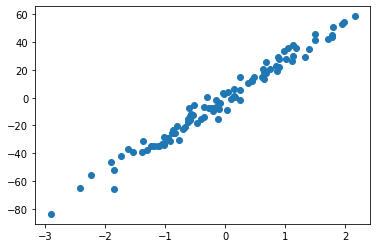

In [390]:
x,y = make_regression(n_samples=100, n_features=1, n_targets=1, noise=5, random_state=3)
x,y = torch.tensor(x), torch.tensor(y)
plt.scatter(x,y)
plt.show()

In [391]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)
print(f'Initial weight : {w} | Initial bias : {b}')

Initial weight : 1.0 | Initial bias : 0.0


In [392]:
def forward(x,w,b):
    return (x * w) + b

def loss_fn(yhat,y):
    yhat = yhat.reshape(yhat.shape[0])
    loss = (yhat-y)**2
    return torch.mean(loss)

def plot_line(x,y,w,b):
    plt.scatter(x,y)
    plt.scatter(x,forward(x,w,b).detach(), c='r')
    plt.grid(True)
    plt.show()

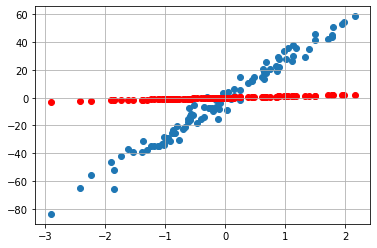

In [393]:
plot_line(x,y,w,b)

Epoch : 0 | Loss : 827.8654675501348
Epoch : 15 | Loss : 421.2676358313778
Epoch : 30 | Loss : 220.18044489166914
Epoch : 45 | Loss : 120.36457605116404
Epoch : 60 | Loss : 70.61611307456593
Epoch : 75 | Loss : 45.71077262078782
Epoch : 90 | Loss : 33.1820061527454
Epoch : 105 | Loss : 26.84644362746126
Epoch : 120 | Loss : 23.62485392969643
Epoch : 135 | Loss : 21.977101606167864


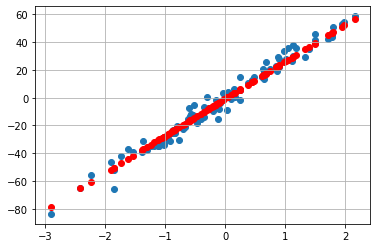

In [394]:
epochs = 150
lr = 0.01
weights = []
biases = []

for epoch in range(epochs):

    yhat = forward(x,w,b)
    loss = loss_fn(yhat,y)
    loss.backward()

    with torch.no_grad():
        w -= (w.grad * lr)
        b -= (b.grad * lr)

        w.grad.zero_()
        b.grad.zero_()

    if epoch % (epochs/10) == 0 :
        print(f"Epoch : {epoch} | Loss : {loss}")

    if epoch % (epochs/5) == 0 :
        weights.append(w.item())
        biases.append(b.item())

plot_line(x,y,w,b)

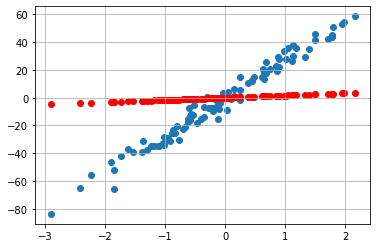

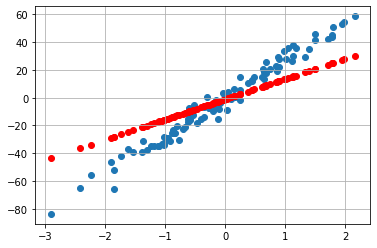

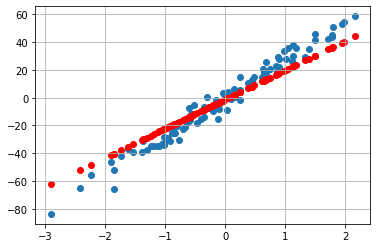

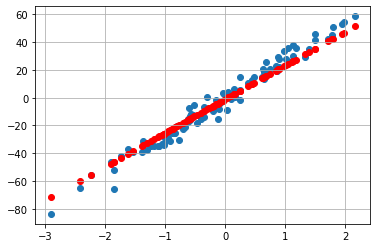

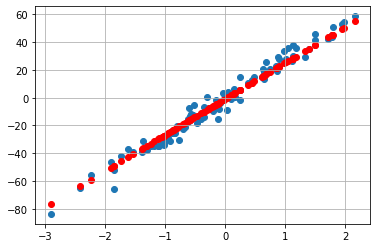

In [395]:
for i in zip(weights,biases):
    plot_line(x,y,i[0],i[1])